# Raster Analysis

In [28]:
import rasterio
from matplotlib import pyplot
import rioxarray
import geopandas as gpd
import rasterstats

## Reading in a tiff

In [2]:
raster_in = 'https://github.com/jbousquin/Python_OpenSource_GIS/raw/main/extdata/NLCD_2021_Tree_Canopy_mulino.tif'

### Data structure

In [3]:
canopy = rasterio.open(raster_in)
type(canopy)

rasterio.io.DatasetReader

In [4]:
# Has shape of grid (rows, columns)
canopy.shape

(25, 25)

In [5]:
# Has spatial information for grid as a whole, not individual grid cells
canopy.bounds

BoundingBox(left=-2059275.0, bottom=2759745.0, right=-2058525.0, top=2760495.0)

In [6]:
canopy.close()  # Good house-keeping

### Data Array

In [7]:
# A raster dataset can be multi-band, each accessed by the band's index starting at 1
with rasterio.open(raster_in) as src:
        image = src.read(1) # first band as array

In [8]:
# Note same grid shape
image.shape

(25, 25)

In [9]:
# As an array, you can see each cell has an integer value 0-100
image

array([[ 0,  0, 43, 70, 52, 14, 18, 36, 55, 65, 73, 56, 28, 16,  0,  0,
         0,  0,  0,  0,  0, 73, 42,  0,  0],
       [ 0,  0, 43, 73, 62, 18, 24, 27, 65, 69, 67, 33,  0,  0,  0,  0,
         0,  0,  0,  0, 22, 59, 37,  5,  0],
       [ 0,  0, 34, 71, 70, 36, 39, 66, 69, 63, 21,  0,  0, 13, 29,  0,
         0,  0,  0,  0,  0,  0, 17, 36,  0],
       [ 0, 11, 22, 45, 45,  0, 64, 68, 66, 33,  0,  0,  0, 26, 15,  0,
         0,  0,  0,  0,  0,  0, 39, 50,  0],
       [ 6,  6,  9,  0, 25,  0, 31, 32, 34, 32,  0,  0,  0, 11,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21, 32, 32, 23,  0,  0,  0,  0,
         0,  0,  0, 21,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  0, 18, 16, 12, 11,  0, 27, 22,  0,  0,  0,  0,
         0,  0, 17, 25, 13,  9, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  6,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 27, 22, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

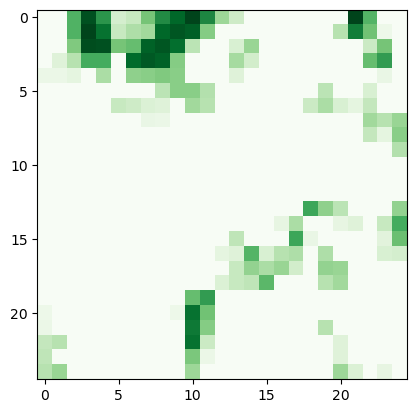

In [10]:
# Quick plot
pyplot.imshow(image, cmap='Greens')

## rioxarray - Combining rasterio and xarray

In [11]:
canopy_valu = rioxarray.open_rasterio(raster_in)

In [12]:
canopy_valu

<xarray.DataArray (band: 1, y: 25, x: 25)>
[625 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -2.059e+06 -2.059e+06 ... -2.059e+06 -2.059e+06
  * y            (y) float64 2.76e+06 2.76e+06 2.76e+06 ... 2.76e+06 2.76e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

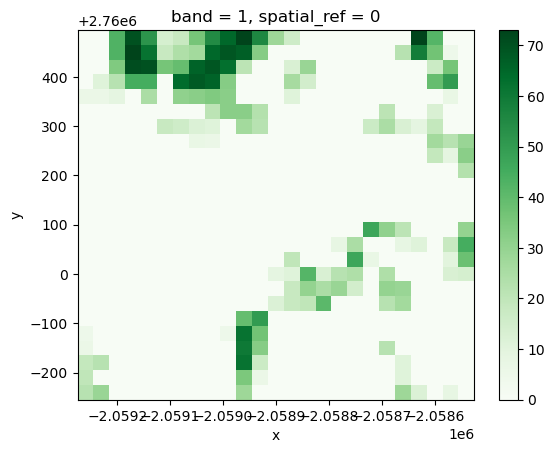

In [13]:
canopy_valu.plot(cmap='Greens')

### Raster to Raster Analysis

In [14]:
# rescaling by an upscale factor (doubles the number of cells)
upscale_factor = 2

In [15]:
new_width = canopy_valu.rio.width * upscale_factor
new_height = canopy_valu.rio.height * upscale_factor

In [16]:
canopy_upsampled_bi = canopy_valu.rio.reproject(
    canopy_valu.rio.crs,
    shape=(new_height, new_width),
    resampling=rasterio.enums.Resampling.bilinear)

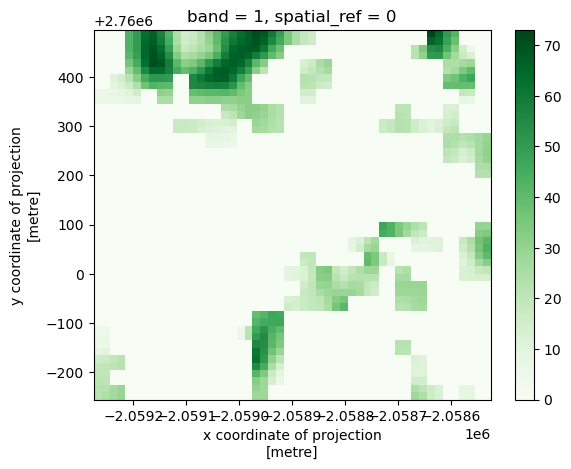

In [17]:
canopy_upsampled_bi.plot(cmap='Greens')

In [18]:
canopy_upsampled_avg = canopy_valu.rio.reproject(
    canopy_valu.rio.crs,
    shape=(new_height, new_width),
    resampling=rasterio.enums.Resampling.average)

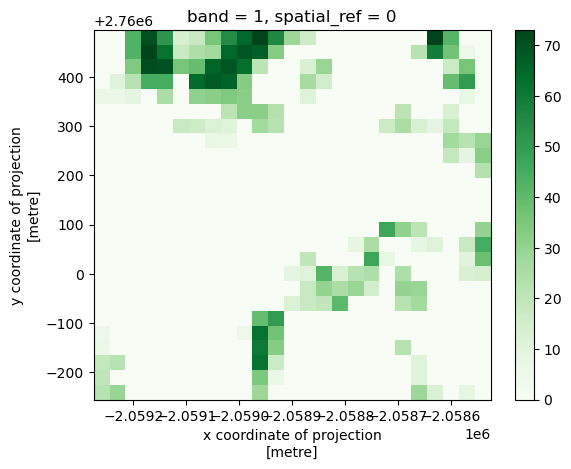

In [19]:
canopy_upsampled_avg.plot(cmap='Greens')

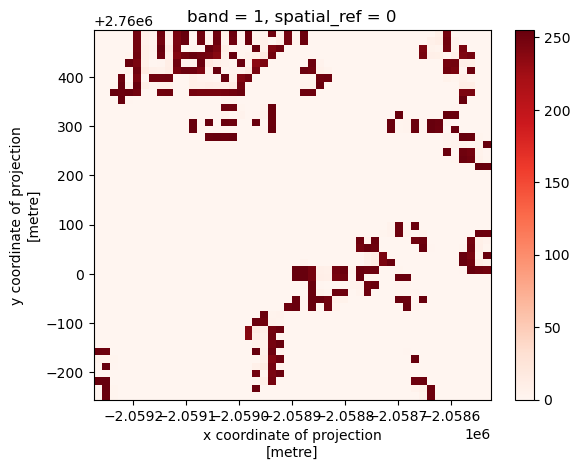

In [20]:
canopy_diff = canopy_upsampled_avg - canopy_upsampled_bi
canopy_diff.plot(cmap='Reds')

In [22]:
canopy_upsampled_avg[0,1][5]

<xarray.DataArray ()>
array(43, dtype=uint8)
Coordinates:
    x            float64 -2.059e+06
    y            float64 2.76e+06
    band         int32 1
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

In [23]:
canopy_upsampled_bi[0,1][5]

<xarray.DataArray ()>
array(50, dtype=uint8)
Coordinates:
    x            float64 -2.059e+06
    y            float64 2.76e+06
    band         int32 1
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

In [24]:
canopy_diff[0,1][5]

<xarray.DataArray ()>
array(249, dtype=uint8)
Coordinates:
    x            float64 -2.059e+06
    y            float64 2.76e+06
    band         int32 1
    spatial_ref  int32 0

### Writing to local file

In [35]:
out_file = r'C:\Users\jbousqui\Local_GIS\temp_test\OS_canopy_example.tif'
canopy_upsampled_bi.rio.to_raster(out_file)

## Raster / vector Analysis

Inputs must be in the same coordinate reference system

In [36]:
# Raster CRS
nlcd_crs = canopy_valu.rio.crs
nlcd_crs

CRS.from_epsg(5070)

In [41]:
# Vecotr - Polygon
in_poly = 'https://github.com/jbousquin/Python_OpenSource_GIS/raw/main/extdata/'
gdf = gpd.read_file(in_poly)
gdf = gdf.to_crs(nlcd_crs)

In [49]:
# Zonal stats
stats = rasterstats.zonal_stats(gdf.iloc[1]['geometry'], raster_in)
stats

[{'min': 18.0, 'max': 18.0, 'mean': 18.0, 'count': 1}]

In [53]:
# Vector - Points
# copy GeoDataFrame
points = gdf.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid

In [57]:
points

,Id,geometry
0,1,POINT (-2059182.559 2760465.468)
1,2,POINT (-2059111.207 2760449.612)
2,3,POINT (-2058610.955 2760252.207)
3,4,POINT (-2058954.234 2760329.107)
4,5,POINT (-2058589.550 2760436.927)


In [58]:
# Sample a point
pts = rasterstats.point_query(points, raster_in)
pts

[59.5421732450843,
 19.9982079984852,
 19,
 30.144380448574182,
 24.879266220520947]